In [19]:
from tensorflow import keras  
from tensorflow.keras import layers 

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [20]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 128)         3699

In [21]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 42s 44ms/step - loss: 0.1756 - accuracy: 0.9473
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0472 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 41s 43ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0215 - accuracy: 0.9934


In [22]:
#Evaluating the convnet

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0229 - accuracy: 0.9924
Test accuracy: 0.992


In [23]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model_no_max_pool.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_4 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils

print(tf.__version__)

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        src_dir = original_dir / category
        print(dir)
        os.makedirs(dir)
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=src_dir / fname, dst=dir / fname)

2.8.2


In [26]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train")
new_base_dir = pathlib.Path("/content/drive/MyDrive/All-datasets/cats_and_dogs_small")

print(original_dir, new_base_dir)

if not os.path.exists(new_base_dir):
    make_subset("train", start_index=0, end_index=1000)
    make_subset("validation", start_index=1000, end_index=1500)
    make_subset("test", start_index=1500, end_index=2500)
else:
    print('{0} already exists, no need to copy the data again!'.format(new_base_dir))

/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train /content/drive/MyDrive/All-datasets/cats_and_dogs_small
/content/drive/MyDrive/All-datasets/cats_and_dogs_small already exists, no need to copy the data again!


In [27]:
from tensorflow import keras  
from tensorflow.keras import layers  


inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
#Data preprocessing
#Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 198 files belonging to 3 classes.
Found 100 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [31]:
import numpy as np
import tensorflow as tf 
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [32]:
for i, element in enumerate(dataset):
  print(element.shape)
  if i >= 2:
    break

(16,)
(16,)
(16,)


In [33]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
  print(element.shape)
  if i >= 2:
    break

(32, 16)
(32, 16)
(32, 16)


In [34]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
  print(element.shape)
  if i >= 2:
    break

(4, 4)
(4, 4)
(4, 4)


In [35]:
#Displaying the shapes of the data and labels yielded by the Dataset
for data_batch, labels_batch in train_dataset:
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [36]:
#Fitting the model using a Dataset

callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath='convnet_from_scratch.keras',
                 save_best_only=True,
                 monitor='val_loss')
             ]


history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
7/7 [==============================] - 17s 2s/step - loss: 1.0766 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 15s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 15s 2s/step - loss: 0.6944 - accuracy: 0.5152 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 4/30
7/7 [==============================] - 15s 2s/step - loss: 0.6909 - accuracy: 0.5758 - val_loss: 0.6940 - val_accuracy: 0.5200
Epoch 5/30
7/7 [==============================] - 16s 2s/step - loss: 0.7987 - accuracy: 0.6061 - val_loss: 0.6925 - val_accuracy: 0.5400
Epoch 6/30
7/7 [==============================] - 15s 2s/step - loss: 0.6915 - accuracy: 0.5505 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 7/30
7/7 [==============================] - 15s 2s/step - loss: 0.6860 - accuracy: 0.5202 - val_loss: 1.6714 - val_accuracy: 0.5000
Epoch 8/30
7/7 [==================

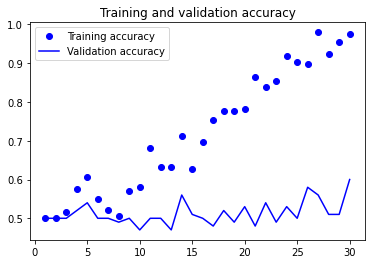

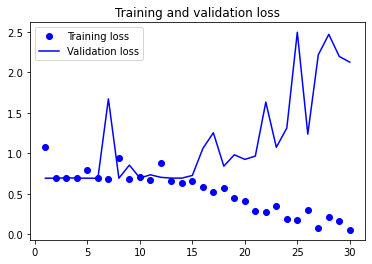

In [37]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [38]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 [==============================] - 1s 1s/step - loss: 0.7029 - accuracy: 0.3333
Test accuracy: 0.333


In [39]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [41]:
#Extracting the VGG16 features and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [42]:
train_features.shape

(198, 5, 5, 512)

In [43]:
#Defining and training the densely connected classifier

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath='feature_extraction.keras',
                 save_best_only=True,
                 monitor='val_loss')
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
7/7 [==============================] - 1s 69ms/step - loss: 154.3351 - accuracy: 0.6869 - val_loss: 11.0841 - val_accuracy: 0.9400
Epoch 2/20
7/7 [==============================] - 0s 43ms/step - loss: 2.5893 - accuracy: 0.9747 - val_loss: 11.3817 - val_accuracy: 0.9400
Epoch 3/20
7/7 [==============================] - 0s 39ms/step - loss: 1.1296 - accuracy: 0.9798 - val_loss: 11.8083 - val_accuracy: 0.9400
Epoch 4/20
7/7 [==============================] - 0s 53ms/step - loss: 0.9020 - accuracy: 0.9798 - val_loss: 8.6214 - val_accuracy: 0.9500
Epoch 5/20
7/7 [==============================] - 0s 41ms/step - loss: 0.8331 - accuracy: 0.9899 - val_loss: 17.6024 - val_accuracy: 0.9100
Epoch 6/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 17.6024 - val_accuracy: 0.9100
Epoch 7/20
7/7 [==============================] - 0s 41ms/step - loss: 2.2127e-17 - accuracy: 1.0000 - val_loss: 17.6024 - val_accuracy: 0.9100
Epoch 8/20


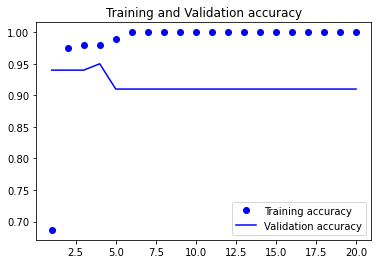

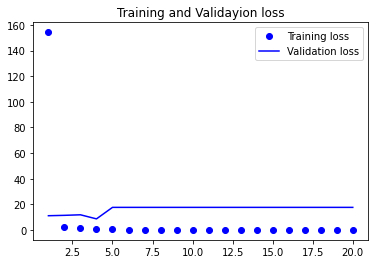

In [44]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validayion loss')
plt.legend()

plt.show()

In [45]:
#Instantiating and freezing the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False)
conv_base.trainable = False

In [46]:
conv_base.trainable = True
print('This is the number of trainable weights '
      'before freezing the conv base: ', len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base:  26


In [47]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [48]:
#Adding a data augmentation stage and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath = 'feature_extraction_with_data_augmentation.keras',
                 save_best_only = True,
                 monitor = 'val_loss')
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
7/7 [==============================] - 88s 13s/step - loss: 80.8953 - accuracy: 0.6616 - val_loss: 3.8027 - val_accuracy: 0.9700
Epoch 2/50
7/7 [==============================] - 86s 13s/step - loss: 9.0085 - accuracy: 0.9545 - val_loss: 6.2347 - val_accuracy: 0.9400
Epoch 3/50
7/7 [==============================] - 86s 13s/step - loss: 8.8459 - accuracy: 0.9293 - val_loss: 5.9733 - val_accuracy: 0.9300
Epoch 4/50
7/7 [==============================] - 86s 13s/step - loss: 4.7058 - accuracy: 0.9495 - val_loss: 9.4806 - val_accuracy: 0.9400
Epoch 5/50
7/7 [==============================] - 88s 13s/step - loss: 4.2152 - accuracy: 0.9596 - val_loss: 15.2040 - val_accuracy: 0.9000
Epoch 6/50
7/7 [==============================] - 86s 13s/step - loss: 1.5210 - accuracy: 0.9798 - val_loss: 8.7838 - val_accuracy: 0.9600
Epoch 7/50
7/7 [==============================] - 86s 13s/step - loss: 0.9885 - accuracy: 0.9747 - val_loss: 13.0154 - val_accuracy: 0.9200
Epoch 8/50
7/7 [========

In [50]:
#Evaluating the model on the test set

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.000


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [52]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [53]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
7/7 [==============================] - 99s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.8371 - val_accuracy: 0.9500
Epoch 2/30
7/7 [==============================] - 97s 14s/step - loss: 0.3215 - accuracy: 0.9899 - val_loss: 12.9361 - val_accuracy: 0.9500
Epoch 3/30
7/7 [==============================] - 99s 15s/step - loss: 6.8308e-27 - accuracy: 1.0000 - val_loss: 12.9361 - val_accuracy: 0.9500
Epoch 4/30
7/7 [==============================] - 97s 14s/step - loss: 0.2773 - accuracy: 0.9949 - val_loss: 10.3016 - val_accuracy: 0.9500
Epoch 5/30
7/7 [==============================] - 97s 14s/step - loss: 1.1941e-20 - accuracy: 1.0000 - val_loss: 10.3016 - val_accuracy: 0.9500
Epoch 6/30
7/7 [==============================] - 98s 14s/step - loss: 0.8712 - accuracy: 0.9848 - val_loss: 13.5416 - val_accuracy: 0.9500
Epoch 7/30
7/7 [==============================] - 96s 14s/step - loss: 2.6722e-09 - accuracy: 1.0000 - val_loss: 13.5321 - val_accuracy: 0.9500
Epoc

In [54]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.000
